<a href="https://colab.research.google.com/github/masp42/ML_CA3/blob/main/Marcelo_Pugliesi_ML_CA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART 1: Computer Vision**



I am Sorry David. 

This is not a mistake. 

I haven't done the PART 1 of the CA.

# **PART 2: Semantic Analysis**

## **Importing python libraries**

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np 
import pandas as pd
import nltk

from tensorflow import keras
from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud


## **Reading the tsv files**

In [2]:
trainingData = pd.read_table("https://raw.githubusercontent.com/masp42/ML_CA3/main/train.tsv")
testing_data = pd.read_table("https://raw.githubusercontent.com/masp42/ML_CA3/main/test.tsv")

## **About the Dataset**

***Sentiment Analysis on Movie Reviews***

Classify the sentiment of sentences from the Rotten Tomatoes dataset 

This dataset can be downloaded from Kaggle: 

https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data?select=train.tsv.zip


Sentimental analysis on Movie review is explained where the reviews are classified into Positive , Negative and Neutral.

Dataset has training and test zip folders.

It is a large data set with 156060 reviews in training set and 66292 reviews in test set.


Dataset has 4 attributes:

***Phrase ID - an ID unique to a given file***

***Sentence ID - an ID unique to a given file***

***Prase - with the comment or review left by Rotten Tomatoes reviewers***

***Sentiment labels range between 0 – 4***. 

The sentiment labels are:

0 - negative

1 - somewhat negative

2 - neutral

3 - somewhat positive

4 - positive

## **Exploratory data analysis**

In [3]:
trainingData.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
print("Count - training data", len(trainingData))
print("Count - testing data", len(testing_data))

Count - training data 156060
Count - testing data 66292


As we can see above, 156060 reviews in training set and 66292 reviews in test set.

In [5]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [6]:
trainingData.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [7]:

trainingData.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [8]:
#
target_category = trainingData['Sentiment'].unique()
target_category=list(map(str,target_category))
print(target_category)

['1', '2', '3', '4', '0']


In [9]:
# Beginning of the Training dataset
trainingData = trainingData[['Phrase','Sentiment']]
trainingData.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [10]:
# Ending of the Training dataset
trainingData.tail(7)

,Phrase,Sentiment
156053,beneath Hearst 's forced avuncular chortles,2
156054,Hearst 's forced avuncular chortles,2
156055,Hearst 's,2
156056,forced avuncular chortles,1
156057,avuncular chortles,3
156058,avuncular,2
156059,chortles,2


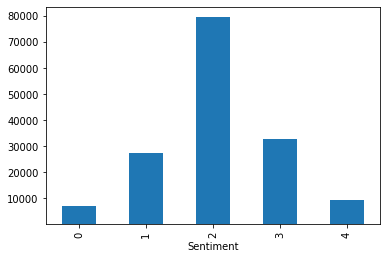

In [11]:
# Visualizing Sentiment Labels amount
trainingData.groupby("Sentiment").Sentiment.count().plot.bar(ylim=1)

The sentiment labels are:

0 - negative

1 - somewhat negative

2 - neutral

3 - somewhat positive

4 - positive

As we can see above  Neutral Sentiment are the majority of the reviews.

## **Data Pre-Processing**

Here I will start the steps of Data Cleaning, Data Integration, Data Reduction and Data Transformation ( Normalization, Agregation, Generalization)

In [12]:
# transforming sentiments to required classes
trainingData.loc[(trainingData['Sentiment'] == 0) | (trainingData['Sentiment'] == 1) , 'Sentiment'] = 0
trainingData.loc[trainingData['Sentiment'] == 2 , 'Sentiment'] = 1
trainingData.loc[(trainingData['Sentiment'] == 3) | (trainingData['Sentiment'] == 4) , 'Sentiment'] = 2

On this Step I am performing Data transformation of the Sentiment Labels. 

Instead of 4 labels ( negative, somewhat negative, neutral, somewhat positive and positive), 3 Labels (Negative, Neutral, Positive) will be used.

Negative (0) and somewhat negative (1) are becoming Negative (0).

Neutral (2) is becoming Neutral (1).

Somewhat positive (3) and positive (4) are becoming Positive (2).


This step is necessary for better visualization and further analisys of the sentiment analysis.



In [13]:
# Visualizing  training data after conversion
trainingData.head(20)

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,0
1,A series of escapades demonstrating the adage ...,1
2,A series,1
3,A,1
4,series,1
5,of escapades demonstrating the adage that what...,1
6,of,1
7,escapades demonstrating the adage that what is...,1
8,escapades,1
9,demonstrating the adage that what is good for ...,1


In [14]:
# Ending of the Training dataset after conversion
trainingData.tail(7)

,Phrase,Sentiment
156053,beneath Hearst 's forced avuncular chortles,1
156054,Hearst 's forced avuncular chortles,1
156055,Hearst 's,1
156056,forced avuncular chortles,0
156057,avuncular chortles,2
156058,avuncular,1
156059,chortles,1


As we can see above the Sentiment column already show the new labels at the beginning and at the end of the training dataset.

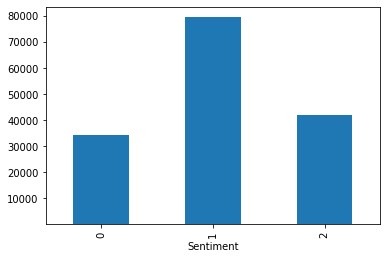

In [15]:
# Sentiment distribution
trainingData.groupby("Sentiment").Sentiment.count().plot.bar(ylim=1)

New plot after the Sentiment label conversion 

0 - Negative

1 - Neutral

2 - Positive

Still showing that Neutral Sentiment is the majority but with increased numbers for Negative and Positive Sentiments. 

## **Pie chart distribution**

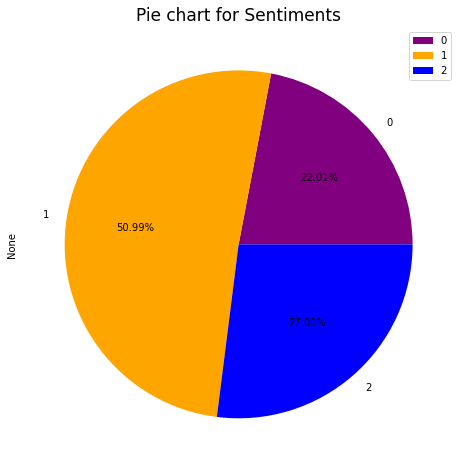

In [16]:
category = trainingData.groupby('Sentiment').size()

category.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['purple','orange','blue'])
plt.title("Pie chart for Sentiments",fontsize=17)
plt.legend()
plt.show()

The pie chart above shows the distribution of the sentiments 0, 1 and 2.

Negative sentiment(0) has 22% of the reviews.

Neutral (1) 50.99% of the reviews. 

Positive (2) has 27% of the reviews.


In [17]:
def dataPreProcessing(text): 

    #read text
    text = str(text)
    # remove ' quotes
    text = text.replace("'", "")
    
    #word tokenization using text-to-word-sequence from keras
    tokenizedTrainingData = text_to_word_sequence(text,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=" ")

    #remove stop words if any
    stopWords = set(stopwords.words('english'))
    stopwordremove = [i for i in tokenizedTrainingData if not i in stopWords]

    #join words into sentence and remove numbers if any
    textwithoutStopwords = ' '.join(stopwordremove)
    textwithoutNumbers = ''.join(c for c in textwithoutStopwords if not c.isdigit())
        
    #Stemming
    stemmer= PorterStemmer()
    stemInput=nltk.word_tokenize(textwithoutNumbers)
    stemmedText=' '.join([stemmer.stem(word) for word in stemInput])
    
    #lemmatization

    lemmatizer = WordNetLemmatizer()
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    lemmatizerInput = nltk.word_tokenize(stemmedText)
    lemmatizedText= ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in lemmatizerInput])
    
    return lemmatizedText

Processing function is defined where stemming, lemmatizing and stopwords are removed to reduce the dimensionality of the data and improve the model performance.

**Stemming** – suffix of words are removed. 

**Lemmatizing** – similar to stemming but retains the dictionary form of the word

**Stopwords** – removing the common words such as 'is', 'the' etc (Jabeen, 2018).

Below was necessary to import  more modules from **NLTK** (Natural Language Processing) Like:

***Stopwords:*** Stop words are common terms like 'the,' 'and,' 'I,' and others that appear frequently in text but don't communicate information about the document's unique topic. To clean up the data, we can remove these stop words from the text in a corpus and find words that are more unusual and potentially more relevant to what we're looking for (Tutorials, 2022).

**punkt (Sentence Tokenizer)**: This tokenizer separates a text into a list of sentences by building a model for abbreviated words, collocations, and words that begin sentences using an unsupervised method. Before it can be utilized, it must be trained on a substantial amount of plaintext in the target language (Documentation, 2022).

**averaged_perceptron_tagger**: is used for tagging words with their parts of speech (POS).(Keen, 2017)

**wordnet**: WordNet is an English lexical database. Synsets are useful for identifying conceptual links between words like hypernyms, hyponyms, synonyms, and antonyms (Documentation, 2022).

In [18]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [19]:
trainingData['Phrase'] = trainingData['Phrase'].apply(dataPreProcessing)
phrase = trainingData['Phrase']
sentiment = trainingData['Sentiment']
phrase.head()

0    seri escapad demonstr adag good goo also good ...
1                  seri escapad demonstr adag good goo
2                                                 seri
3                                                     
4                                                 seri
Name: Phrase, dtype: object

## **Word Cloud**

A word cloud (also known as a tag cloud or a weighted list) is a visual representation of text information. Words are usually single words, with font size and color indicating their importance. Fortunately, Python offers a wordcloud package that allows us to create them (Gallery, 2018).

Below we are going to visualize 3 Word Cloud:

**Negative word cloud**

**Neutral word cloud** 

**Positive word cloud** 




In [20]:
def wordCollection(phrase, sentiment):
    words = []
    for i in phrase[phrase['Sentiment'] == sentiment]['Phrase'].str.split():
        for j in i:
            words.append(j)
    return words

negative = wordCollection(trainingData,0)
neutral = wordCollection(trainingData,1)
positive = wordCollection(trainingData,2)

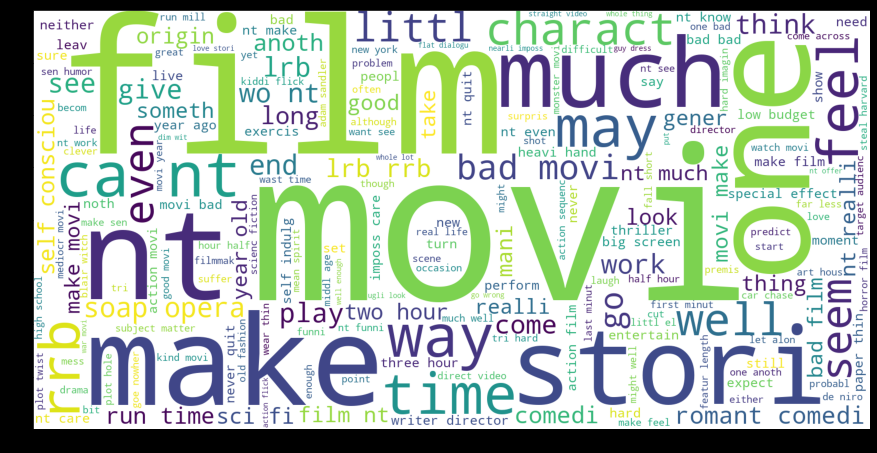

In [21]:
#Negative word cloud
wordCloud = WordCloud(background_color="white", width=1600, height=800).generate(' '.join(negative))
plt.figure(figsize=(15,15), facecolor='k')
plt.imshow(wordCloud)

Above is the visual representation of the Negative Sentiment text information.

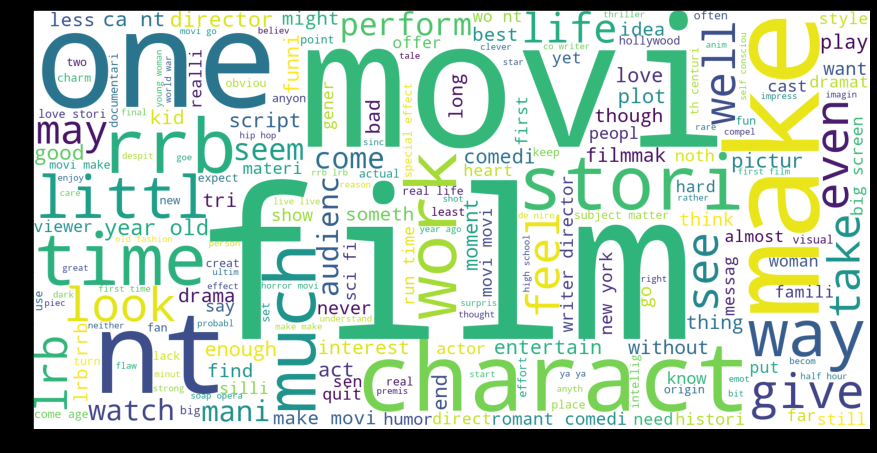

In [22]:
#neutral word cloud
wordCloud = WordCloud(background_color="white", width=1600, height=800).generate(' '.join(neutral))
plt.figure(figsize=(15,15), facecolor='k')
plt.imshow(wordCloud)

Above is the visual representation of the Neutral Sentiment text information.

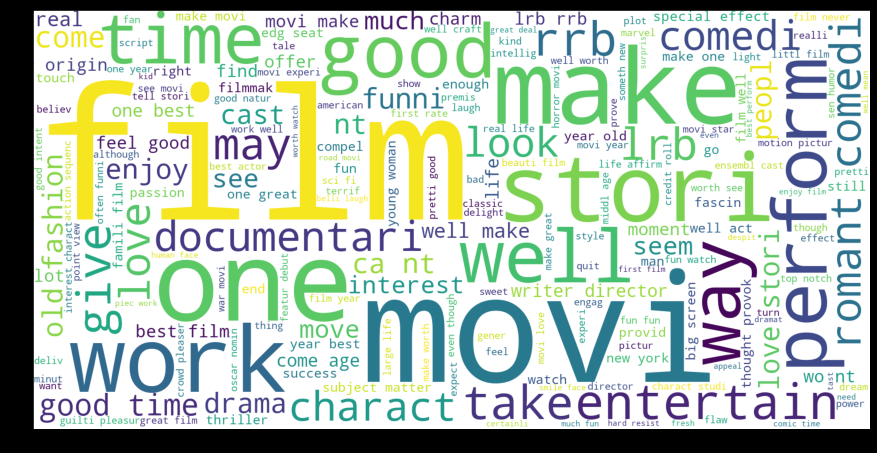

In [23]:
#Positive word cloud
wordCloud = WordCloud(background_color="white", width=1600, height=800).generate(' '.join(positive))
plt.figure(figsize=(15,15), facecolor='k')
plt.imshow(wordCloud)

Above is the visual representation of the Positive Sentiment text information.

In [24]:
list_data = list(zip(phrase, sentiment))
trainingData = pd.DataFrame(list_data,columns = ['Phrase', 'Sentiment'])
trainingData.head(20)

,Phrase,Sentiment
0,seri escapad demonstr adag good goo also good ...,0
1,seri escapad demonstr adag good goo,1
2,seri,1
3,,1
4,seri,1
5,escapad demonstr adag good goo,1
6,,1
7,escapad demonstr adag good goo,1
8,escapad,1
9,demonstr adag good goo,1


In [25]:
# Data cleaning removing null values and blank lines
trainingData['Phrase'].replace('', np.nan, inplace=True)
trainingData.dropna(subset = ["Phrase"], inplace=True)
trainingData.head(20)

,Phrase,Sentiment
0,seri escapad demonstr adag good goo also good ...,0
1,seri escapad demonstr adag good goo,1
2,seri,1
4,seri,1
5,escapad demonstr adag good goo,1
7,escapad demonstr adag good goo,1
8,escapad,1
9,demonstr adag good goo,1
10,demonstr adag,1
11,demonstr,1


In [26]:
print("Count after removing empty rows are: ",len(trainingData))

Count after removing empty rows are:  154674


In [27]:
phrase = trainingData['Phrase']
sentiment = trainingData['Sentiment']
phrase.head()

0    seri escapad demonstr adag good goo also good ...
1                  seri escapad demonstr adag good goo
2                                                 seri
4                                                 seri
5                       escapad demonstr adag good goo
Name: Phrase, dtype: object

## **Train and Test split into 70% and 30% respectively**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(phrase,sentiment, test_size = 0.3, random_state = 60,shuffle=True, stratify=sentiment)
print("Count of X_train",len(X_train))
print("Count of X_test",len(X_test))

Count of X_train 108271
Count of X_test 46403


In [29]:
target_category = trainingData['Sentiment'].unique()
target_category=list(map(str,target_category))
print(target_category)

['0', '1', '2']


## **Decision Tree Classifier Implementation**

In [30]:
DecisionTree = Pipeline([('tfidf', TfidfVectorizer()),('dt', DecisionTreeClassifier()),])

DecisionTree.fit(X_train, Y_train)

test_predict = DecisionTree.predict(X_test)

train_accuracy = round(DecisionTree.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy ))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy ))
print(classification_report(test_predict, Y_test, target_names= target_category))
testing_data.head()

Decision Tree Train Accuracy Score : 90% 
Decision Tree Test Accuracy Score  : 71% 
              precision    recall  f1-score   support

           0       0.68      0.65      0.66     10745
           1       0.75      0.72      0.74     24217
           2       0.65      0.72      0.68     11441

    accuracy                           0.71     46403
   macro avg       0.69      0.70      0.69     46403
weighted avg       0.71      0.71      0.71     46403



,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


# **Result**

***Classification Report***

An overall of 90% Accuracy Score on Training data and 71% Accuracy Score on test set is achieved.

The precision , recall and f1 score ranges between 66% to 74%.

# **References**

Jabeen, H., 2018. Stemming and Lemmatization in Python. [online] Datacamp. Available at: <https://www.datacamp.com/tutorial/stemming-lemmatization-python> [Accessed 19 May 2022].

Tutorials, P., 2022. NLTK stop words. [online] pythonspot. Available at: <https://pythonspot.com/nltk-stop-words/> [Accessed 19 May 2022].


Keen, B., 2017. Basic Language Processing with NLTK – Ben Alex Keen. [online] Benalexkeen.com. Available at: <https://benalexkeen.com/basic-language-processing-with-nltk/> [Accessed 19 May 2022].


Documentation, N., 2022. NLTK :: nltk.corpus.reader.wordnet module. [online] Nltk.org. Available at: <https://www.nltk.org/api/nltk.corpus.reader.wordnet.html> [Accessed 19 May 2022].

Gallery, P., 2018. Wordcloud. [online] Python-graph-gallery.com. Available at: <https://www.python-graph-gallery.com/wordcloud/> [Accessed 19 May 2022].
